# World data

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
from decimal import Decimal

In [2]:
# Read the csv file
world_data_filepath = "C:/Users/Userpc/Desktop/Projects/Machine Learning/world-data-2023.csv"
world_data = pd.read_csv(world_data_filepath)
test_data = world_data.copy()
world_data.shape

(195, 35)

Spatial Distribution

In [16]:
print(test_data.loc[test_data.loc[:, "Density\n(P/Km2)"].isnull()].shape)
print(test_data.loc[test_data.loc[:, "Land Area(Km2)"].isnull()].shape)

(0, 35)
(1, 35)


C:\Users\Userpc\AppData\Local\Temp\ipykernel_12900\2012283399.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_data_density["Density\n(P/Km2)"] = pd.to_numeric(world_data_density.loc[:, "Density\n(P/Km2)"], errors='coerce')
C:\Users\Userpc\AppData\Local\Temp\ipykernel_12900\2012283399.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_data_density["Land Area(Km2)"] = pd.to_numeric(world_data_density.loc[:, "Land Area(Km2)"], errors='coerce')


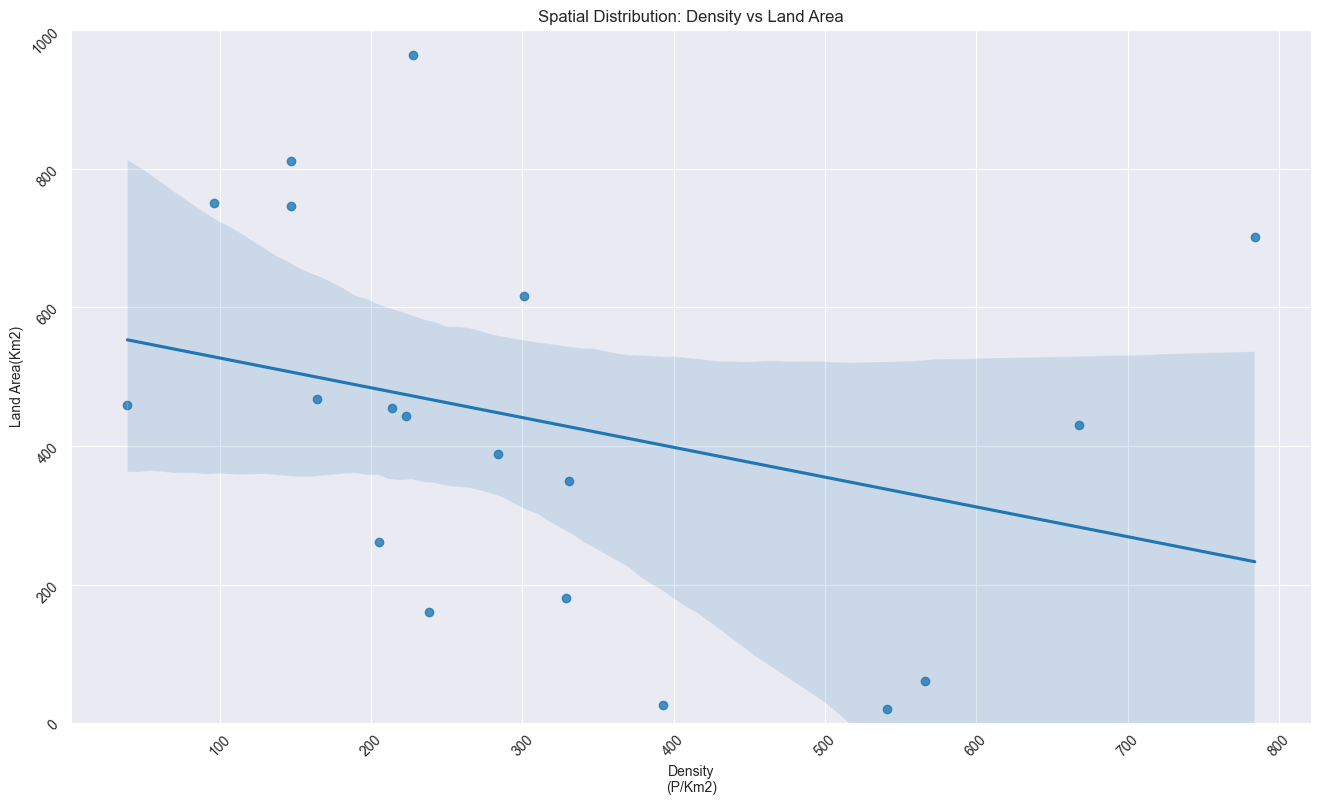

(195, 35)

In [3]:
# Drop missing values and transit the columns into numeric format
world_data_density = test_data.dropna(subset=["Density\n(P/Km2)", "Land Area(Km2)"])
world_data_density["Density\n(P/Km2)"] = pd.to_numeric(world_data_density.loc[:, "Density\n(P/Km2)"], errors='coerce')
world_data_density["Land Area(Km2)"] = pd.to_numeric(world_data_density.loc[:, "Land Area(Km2)"], errors='coerce')


# Seting the size of a figure
plt.figure(figsize=(16, 9))

# Creating regplot to study relationship between density and land area
sns.set_style('darkgrid')
sns.regplot(x=world_data_density.loc[:, "Density\n(P/Km2)"], y=world_data_density.loc[:, "Land Area(Km2)"])
plt.title("Spatial Distribution: Density vs Land Area")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.ylim(0, 1000)

plt.show()
test_data.shape

## Relationship between agricultural land and CPI

In [19]:
print(test_data.loc[test_data.loc[:, "Agricultural Land( %)"].isnull()].shape)
print(test_data.loc[test_data.loc[:, "CPI"].isnull()].shape)

(7, 35)
(17, 35)


C:\Users\Userpc\AppData\Local\Temp\ipykernel_12900\780356827.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_data_agriculture["Agricultural Land( %)"] = world_data_agriculture.loc[:, "Agricultural Land( %)"].str.rstrip('%').astype('float')
C:\Users\Userpc\AppData\Local\Temp\ipykernel_12900\780356827.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_data_agriculture["CPI"] = world_data_agriculture.loc[:, "CPI"].str.replace(',', '').astype('float')


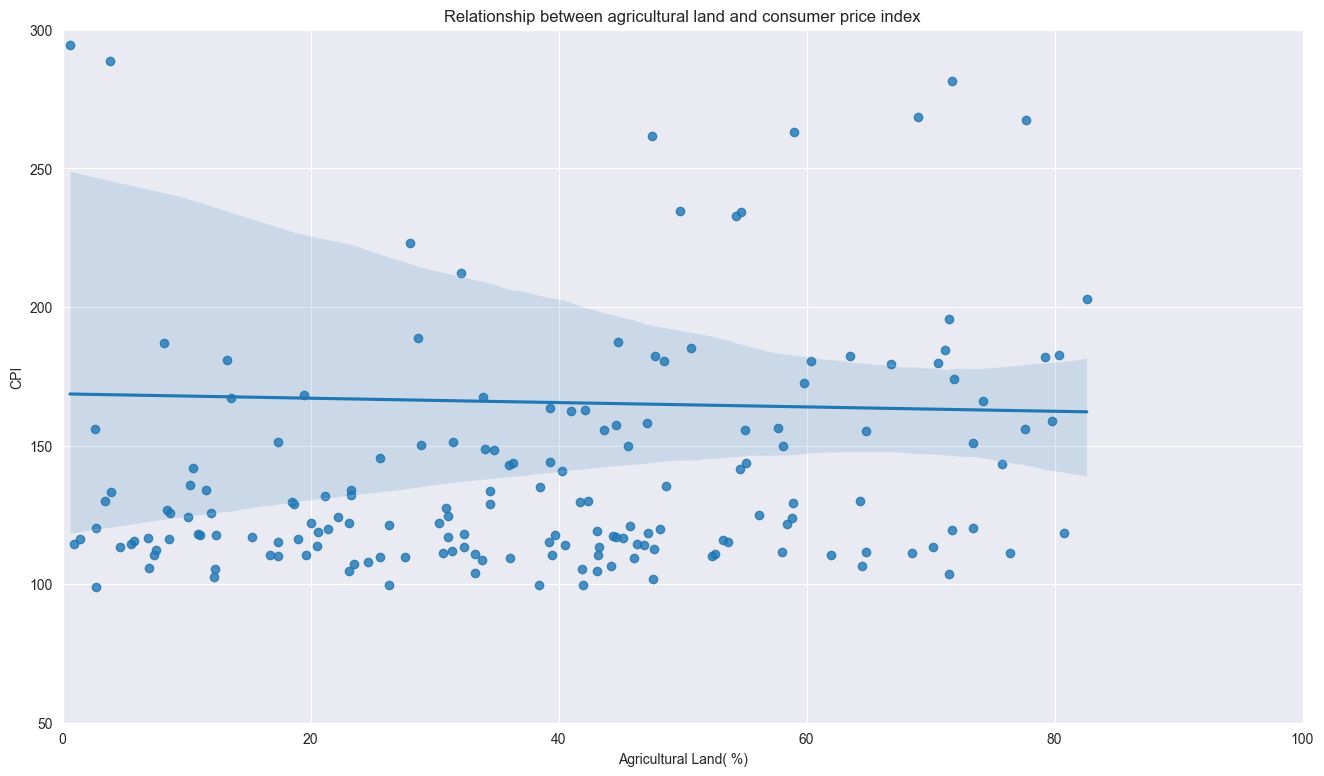

In [21]:
# Drop missing values
world_data_agriculture = test_data.dropna(subset=["Agricultural Land( %)", "CPI"])

# Replacing % to convert values in the column from strings into floats
world_data_agriculture["Agricultural Land( %)"] = world_data_agriculture.loc[:, "Agricultural Land( %)"].str.rstrip('%').astype('float')
# Replacing ',' to convert values in the column from strings into floats
world_data_agriculture["CPI"] = world_data_agriculture.loc[:, "CPI"].str.replace(',', '').astype('float')

# Creating scatterplot and jointplot to study the relationship
plt.figure(figsize=(16, 9))
sns.regplot(x=world_data_agriculture.loc[:, "Agricultural Land( %)"], y=world_data_agriculture.loc[:, "CPI"])
# sns.regplot(x=world_data_agriculture.loc[:, "Agricultural Land( %)"], y=world_data_agriculture.loc[:, "CPI"], data=world_data_agriculture)
# Set ranges for x and y axes
plt.xlim(0, 100)
plt.ylim(50, 300)
plt.title("Relationship between agricultural land and consumer price index")

plt.show()

## Gross primary education enrollment vs unemployment rate

C:\Users\Userpc\AppData\Local\Temp\ipykernel_12900\4086148146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_data_unemployment["Unemployment rate"] = world_data_unemployment.loc[:, "Unemployment rate"].str.strip('%').astype('float')
C:\Users\Userpc\AppData\Local\Temp\ipykernel_12900\4086148146.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_data_unemployment["Gross primary education enrollment (%)"] = world_data_unemployment.loc[:, "Gross primary education enrollment (%)"].str.rstrip("%

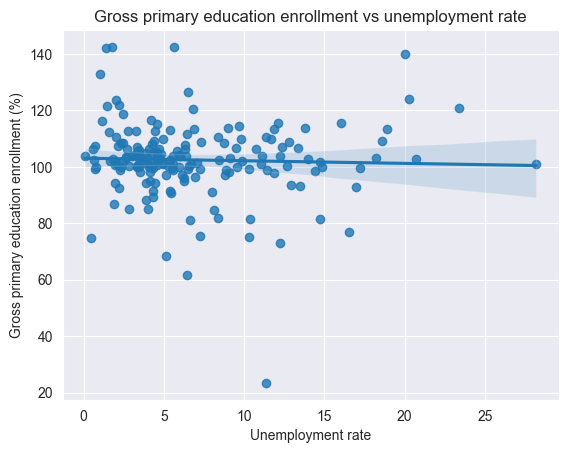

In [24]:
world_data_unemployment = test_data.dropna(subset=["Unemployment rate", "Gross primary education enrollment (%)"])
world_data_unemployment["Unemployment rate"] = world_data_unemployment.loc[:, "Unemployment rate"].str.strip('%').astype('float')
world_data_unemployment["Gross primary education enrollment (%)"] = world_data_unemployment.loc[:, "Gross primary education enrollment (%)"].str.rstrip("%").astype('float')

sns.regplot(y=world_data_unemployment.loc[:, "Gross primary education enrollment (%)"], x=world_data_unemployment.loc[:, "Unemployment rate"])

plt.title("Gross primary education enrollment vs unemployment rate")
plt.show()

## Analysis of healthcare metrics such as infant mortality and life expectancy

In [29]:
print(test_data[["Infant mortality", "Life expectancy"]].dtypes)
print(test_data.loc[test_data.loc[:, "Infant mortality"].isnull()].shape)
print(test_data.loc[test_data.loc[:, "Life expectancy"].isnull()].shape)
print(test_data.loc[test_data.loc[:, "Out of pocket health expenditure"].isnull()].shape)
test_data.loc[:, "Out of pocket health expenditure"].head()

Infant mortality    float64
Life expectancy     float64
dtype: object
(6, 35)
(8, 35)
(7, 35)


0    78.40%
1    56.90%
2    28.10%
3    36.40%
4    33.40%
Name: Out of pocket health expenditure, dtype: object

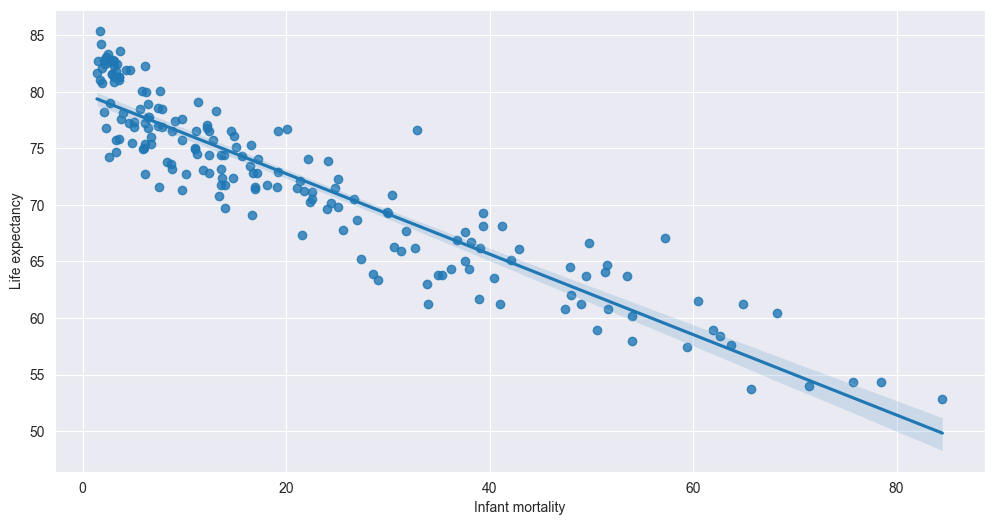

C:\Users\Userpc\AppData\Local\Temp\ipykernel_12900\3367680701.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_data_health["Out of pocket health expenditure"] = world_data_health.loc[:, "Out of pocket health expenditure"].str.rstrip('%').astype('float')


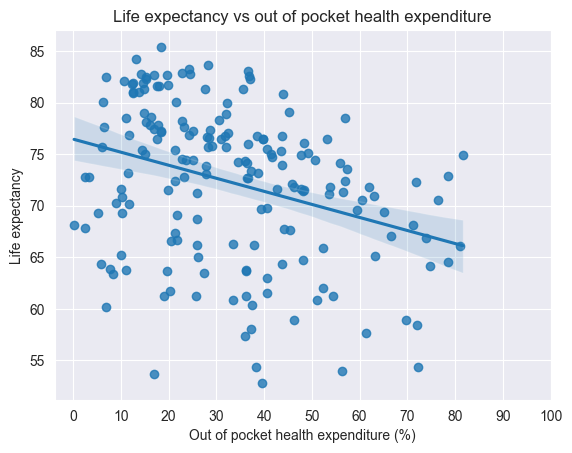

In [38]:
world_data_health = test_data.dropna(subset=["Infant mortality", "Life expectancy", "Out of pocket health expenditure"])

plt.figure(figsize=(12, 6))
sns.regplot(x=world_data_health.loc[:, 'Infant mortality'], y=world_data_health.loc[:, "Life expectancy"])
plt.show()

world_data_health["Out of pocket health expenditure"] = world_data_health.loc[:, "Out of pocket health expenditure"].str.rstrip('%').astype('float')
sns.regplot(x=world_data_health.loc[:, 'Out of pocket health expenditure'], y=world_data_health.loc[:, "Life expectancy"])

plt.title("Life expectancy vs out of pocket health expenditure")
plt.xlabel("Out of pocket health expenditure (%)")
plt.xticks(range(0, 101, 10))
plt.show()

## Labor Force Participation vs Unemployment Rate

In [8]:
print(test_data[["Population: Labor force participation (%)", "Unemployment rate"]].dtypes)
print(test_data.loc[test_data.loc[:, "Population: Labor force participation (%)"].isnull()].shape)
print(test_data.loc[test_data.loc[:, "Unemployment rate"].isnull()].shape)

Population: Labor force participation (%)    object
Unemployment rate                            object
dtype: object
(19, 35)
(19, 35)


C:\Users\Userpc\AppData\Local\Temp\ipykernel_12900\2737020789.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_data_pop_unempl["Population: Labor force participation (%)"] = world_data_pop_unempl.loc[:, "Population: Labor force participation (%)"].astype('str').str.rstrip('%').replace(',', '').astype('float')
C:\Users\Userpc\AppData\Local\Temp\ipykernel_12900\2737020789.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_data_pop_unempl["Unemployment rate"] = world_data_pop_unempl.loc[:, "Une

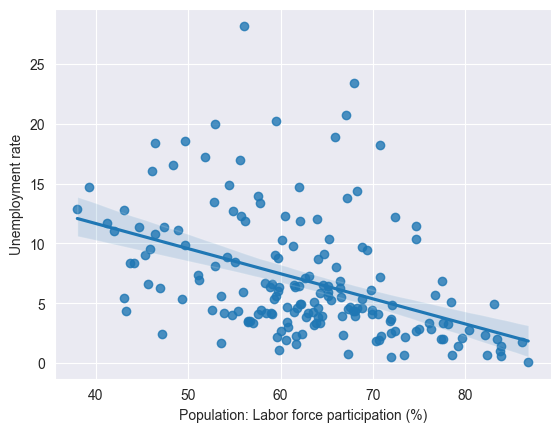

float64
float64
(176, 35)
Number of integers: 176
Number of objects: 0
Unique data types in the column: [<class 'float'>]


In [39]:
world_data_pop_unempl = test_data.dropna(subset=["Population: Labor force participation (%)", "Unemployment rate"])

world_data_pop_unempl["Population: Labor force participation (%)"] = world_data_pop_unempl.loc[:, "Population: Labor force participation (%)"].astype('str').str.rstrip('%').replace(',', '').astype('float')
world_data_pop_unempl["Unemployment rate"] = world_data_pop_unempl.loc[:, "Unemployment rate"].astype('str').str.rstrip('%').replace(',', '').astype('float')

sns.regplot(x=world_data_pop_unempl.loc[:, "Population: Labor force participation (%)"], y=world_data_pop_unempl.loc[:, "Unemployment rate"])

plt.show()

print(world_data_pop_unempl.loc[:, "Unemployment rate"].dtype)
print(world_data_pop_unempl.loc[:, "Population: Labor force participation (%)"].dtype)
# Count the number of integers in the column
num_integers = world_data_pop_unempl['Population: Labor force participation (%)'].apply(lambda x: isinstance(x, float)).sum()

# Count the number of objects (strings) in the column
num_objects = world_data_pop_unempl['Population: Labor force participation (%)'].apply(lambda x: isinstance(x, str)).sum()
data_types = world_data_pop_unempl['Population: Labor force participation (%)'].apply(lambda x: type(x)).unique()

print(world_data_pop_unempl.shape)
print("Number of integers:", num_integers)
print("Number of objects:", num_objects)

print("Unique data types in the column:", data_types)

## The role of taxation and its impact on economic development

In [10]:
print(test_data.loc[test_data.loc[:, "Total tax rate"].isnull()].shape)
print(test_data.loc[test_data.loc[:, "GDP"].isnull()].shape)
test_data.loc[:, "GDP"].head()

(12, 35)
(2, 35)


0     $19,101,353,833 
1     $15,278,077,447 
2    $169,988,236,398 
3      $3,154,057,987 
4     $94,635,415,870 
Name: GDP, dtype: object

C:\Users\Userpc\AppData\Local\Temp\ipykernel_12900\4131236889.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_data_gdp["Total tax rate"] = world_data_gdp.loc[:, "Total tax rate"].astype('str').str.rstrip('%').astype('float')
C:\Users\Userpc\AppData\Local\Temp\ipykernel_12900\4131236889.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_data_gdp["GDP"] = world_data_gdp.loc[:, "GDP"].str.replace(',', '').str.strip('$').apply(float)


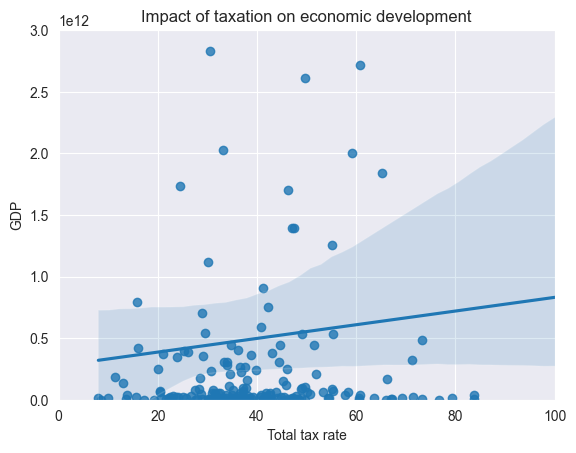

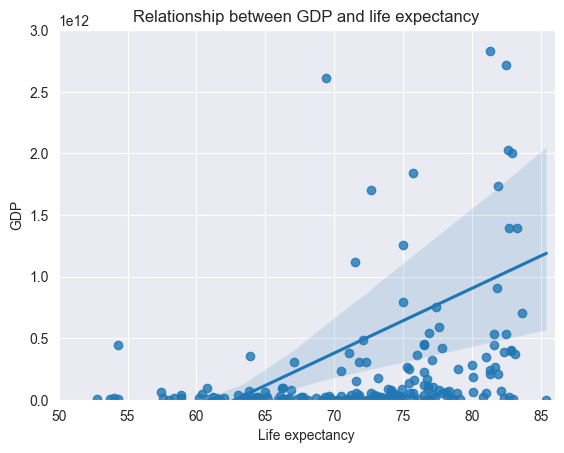

In [11]:
world_data_gdp = test_data.dropna(subset=["Total tax rate", "GDP"])

world_data_gdp["Total tax rate"] = world_data_gdp.loc[:, "Total tax rate"].astype('str').str.rstrip('%').astype('float')
world_data_gdp["GDP"] = world_data_gdp.loc[:, "GDP"].str.replace(',', '').str.strip('$').apply(float)

sns.regplot(y=world_data_gdp.loc[:, "GDP"], x=world_data_gdp.loc[:, "Total tax rate"])
plt.xlim(0, 100)
plt.ylim(0, 3e12)
plt.title("Impact of taxation on economic development")
plt.show()
sns.regplot(y=world_data_gdp.loc[:, "GDP"], x=world_data_gdp.loc[:, "Life expectancy"])

plt.title("Relationship between GDP and life expectancy")
plt.xlim(50, 86)
plt.ylim(0, 3e12)
plt.show()

## Urbanization trends and environmental consequences

In [12]:
print(test_data.loc[test_data.loc[:, "Urban_population"].isnull()].shape)
print(test_data.loc[test_data.loc[:, "Co2-Emissions"].isnull()].shape)
print(test_data.loc[:, "Urban_population"].head())
print(test_data.loc[:, "Co2-Emissions"].head())

(5, 35)
(7, 35)
0     9,797,273
1     1,747,593
2    31,510,100
3        67,873
4    21,061,025
Name: Urban_population, dtype: object
0      8,672
1      4,536
2    150,006
3        469
4     34,693
Name: Co2-Emissions, dtype: object


C:\Users\Userpc\AppData\Local\Temp\ipykernel_12900\4200437841.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_data_urban["Urban_population"] = world_data_urban.loc[:, "Urban_population"].str.replace(',', '').astype('float')
C:\Users\Userpc\AppData\Local\Temp\ipykernel_12900\4200437841.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_data_urban["Co2-Emissions"] = world_data_urban.loc[:, "Co2-Emissions"].str.replace(',', '').astype('int')


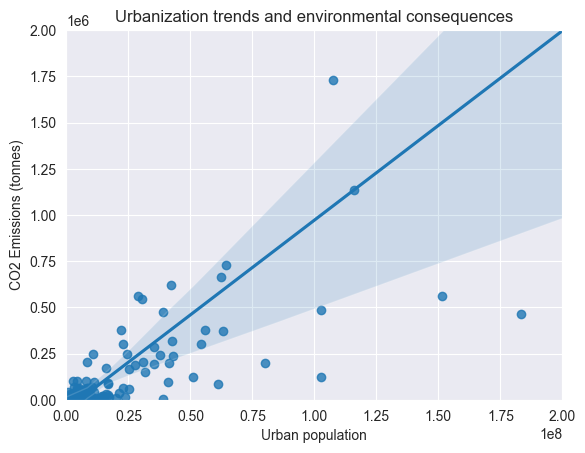

In [13]:
world_data_urban = test_data.dropna(subset=["Urban_population", "Co2-Emissions"])

world_data_urban["Urban_population"] = world_data_urban.loc[:, "Urban_population"].str.replace(',', '').astype('float')
world_data_urban["Co2-Emissions"] = world_data_urban.loc[:, "Co2-Emissions"].str.replace(',', '').astype('int')

sns.regplot(x=world_data_urban.loc[:, "Urban_population"], y=world_data_urban.loc[:, "Co2-Emissions"])

plt.title("Urbanization trends and environmental consequences")

plt.xlabel("Urban population")
plt.ylabel("CO2 Emissions (tonnes)")

plt.xlim(0, 2e8)
plt.ylim(0, 2e6)

plt.show()